In [81]:
# load image from data folder
from skimage import data, transform
from skimage import io
import skimage
import matplotlib.pyplot as plt
image_1 = io.imread('../data/1_2.jpg')
image_2 = io.imread('../data/2_2.jpg')
image_3 = io.imread('../data/3_2.jpg')
image_3[:,:,0] = 0
image_3[:,:,1] = 0
image_1_gray = skimage.color.rgb2gray(image_1)
image_2_gray = skimage.color.rgb2gray(image_2)
image_3_gray = skimage.color.rgb2gray(image_3)

Text(0.5, 1.0, 'histogram of gray values')

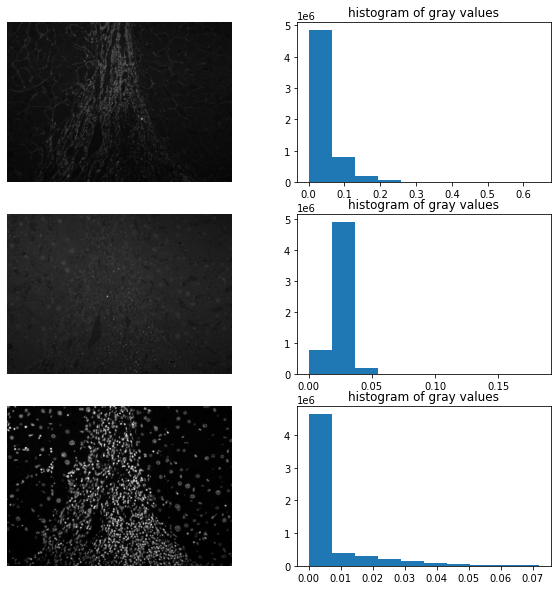

In [82]:
# draw gray scale hist distribution for image_1
from skimage.exposure import histogram
import skimage
fig, axes = plt.subplots(3, 2, figsize = (10,10))
axes[0,0].imshow(image_1_gray, cmap=plt.cm.gray)
axes[0,0].axis('off')
axes[0,1].hist(image_1_gray.reshape(-1))
axes[0,1].set_title('histogram of gray values')
axes[1,0].imshow(image_2_gray, cmap=plt.cm.gray)
axes[1,0].axis('off')
axes[1,1].hist(image_2_gray.reshape(-1))
axes[1,1].set_title('histogram of gray values')
axes[2,0].imshow(image_3_gray, cmap=plt.cm.gray)
axes[2,0].axis('off')
axes[2,1].hist(image_3_gray.reshape(-1))
axes[2,1].set_title('histogram of gray values')

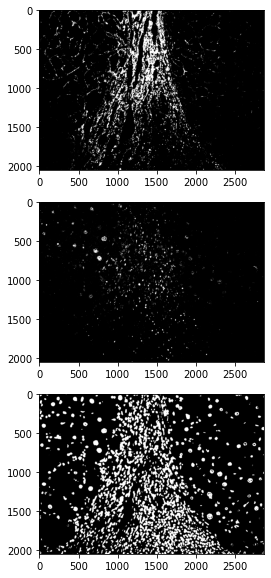

In [83]:
# use supervised segment algo (g > 10) to split critial part from image
# and use binary_fill_holes to fill the scattered dots
# binary_fill_holes: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html#scipy.ndimage.binary_fill_holes
import scipy.ndimage
import numpy as np
fig, axes = plt.subplots(3, 1, figsize = (10,10))

mask_1 = image_1_gray > 0.1
mask_2 = image_2_gray > 0.04
mask_3 = image_3_gray > 0.01

# draw labels
axes[0].imshow(mask_1,cmap='gray')
axes[1].imshow(mask_2,cmap='gray')
axes[2].imshow(mask_3,cmap='gray')

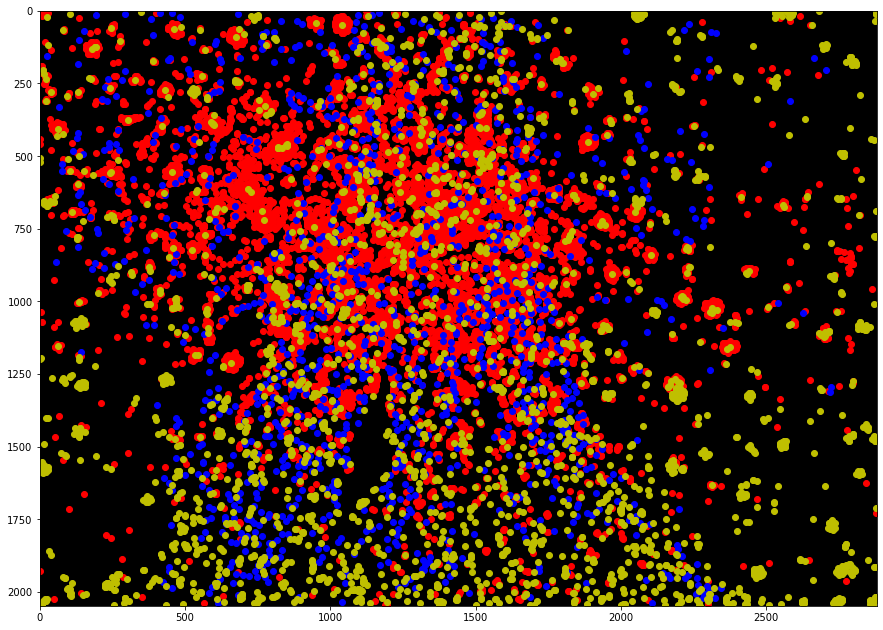

In [84]:
# find contour
from skimage.measure import find_contours
contour_1 = find_contours(mask_1, 0)
contour_2 = find_contours(mask_2, 0)
contour_3 = find_contours(mask_3, 0)
contour_1 = list(filter(lambda x: len(x) > 25, contour_1))
dot_set_1 = np.array([list(np.mean(ct, axis=0)) for ct in contour_1])
dot_set_2 = np.array([list(np.mean(ct, axis=0)) for ct in contour_2])
dot_set_3 = np.array([list(np.mean(ct, axis=0)) for ct in contour_3])
fig, ax = plt.subplots(figsize = (15,15))
ax.imshow(mask_2, cmap='gray')

ax.plot(dot_set_2[:,1], dot_set_2[:,0],linestyle="None", marker='o', color='r')
ax.plot(dot_set_1[:,1], dot_set_1[:,0],linestyle="None", marker='o', color='b')
ax.plot(dot_set_3[:,1], dot_set_3[:,0],linestyle="None", marker='o', color='y')
plt.show()


In [85]:
image_2_1_distance_matrix = np.linalg.norm(dot_set_2[:,None,:] - dot_set_1[None,:,:], axis = -1) # i,j -> distance between the ith point in image 2 and jth point in image 1
image_3_1_distance_matrix = np.linalg.norm(dot_set_3[:,None,:] - dot_set_1[None,:,:], axis = -1) # i,j -> distance between the ith point in image 3 and jth point in image 1

(array([782., 739., 420., 206., 106.,  71.,  54.,  77.,  33.,  66.,  55.,
         44.,  38.,  55.,  40.,  68.,  33.,  20.,  21.,  24.]),
 array([ 32.24035442,  60.74049238,  89.24063034, 117.7407683 ,
        146.24090626, 174.74104422, 203.24118218, 231.74132014,
        260.2414581 , 288.74159607, 317.24173403, 345.74187199,
        374.24200995, 402.74214791, 431.24228587, 459.74242383,
        488.24256179, 516.74269975, 545.24283772, 573.74297568,
        602.24311364]),
 <BarContainer object of 20 artists>)

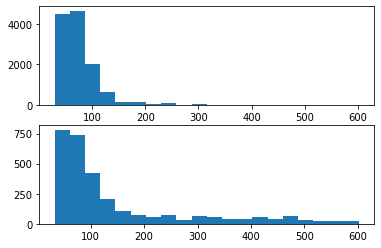

In [86]:
E_10_min_distance_for_image_2 = np.mean(np.sort(image_2_1_distance_matrix)[:,:10], axis = 1)
E_10_min_distance_for_image_3 = np.mean(np.sort(image_3_1_distance_matrix)[:,:10], axis = 1)

_, ax = plt.subplots(2, 1)
ax[0].hist(E_10_min_distance_for_image_2, bins = 20)
ax[1].hist(E_10_min_distance_for_image_3, bins = 20)

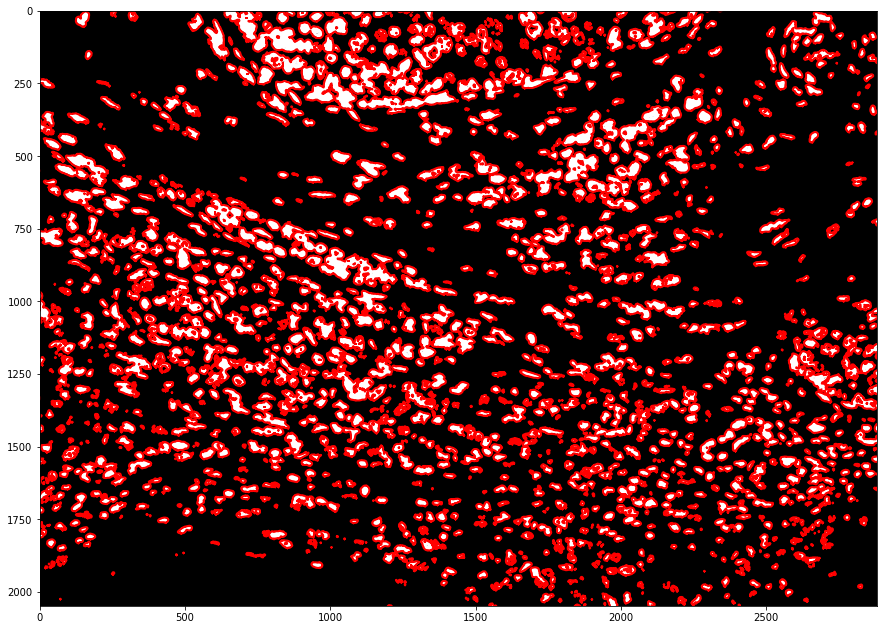

In [76]:
# count the dots in image_3
from skimage.measure import find_contours
fig, ax = plt.subplots(figsize = (15,15))
ax.imshow(mask_3, cmap='gray')

for contour in find_contours(mask_3, 0):
    ax.plot(contour[:,1], contour[:,0], linewidth = 2, color='r')

plt.show()

In [77]:
E_10_min_distance_for_image_2

array([ 61.96457549, 114.98660865, 121.07428975, ..., 126.67503099,
       113.73020793, 159.19101861])

In [78]:
image_2_1_distance_matrix[np.argsort(image_2_1_distance_matrix, axis = 0)[:,:]]

MemoryError: Unable to allocate 328. GiB for an array with shape (8451, 2281, 2281) and data type float64